In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos desde un archivo CSV
data = pd.read_csv("depression_data.csv")

In [2]:
# Ver las primeras filas del dataset
print(data.head())

# Ver información general del dataset
print(data.info())

# Descripción estadística del dataset
print(data.describe())

               Name  Age Marital Status    Education Level  \
0  Christine Barker   31        Married  Bachelor's Degree   
1  Jacqueline Lewis   55        Married        High School   
2    Shannon Church   78        Widowed    Master's Degree   
3    Charles Jordan   58       Divorced    Master's Degree   
4      Michael Rich   18         Single        High School   

   Number of Children Smoking Status Physical Activity Level  \
0                   2     Non-smoker                  Active   
1                   1     Non-smoker               Sedentary   
2                   1     Non-smoker               Sedentary   
3                   3     Non-smoker                Moderate   
4                   0     Non-smoker               Sedentary   

  Employment Status     Income Alcohol Consumption Dietary Habits  \
0        Unemployed   26265.67            Moderate       Moderate   
1          Employed   42710.36                High      Unhealthy   
2          Employed  125332.79     

In [3]:
# Eliminar columnas irrelevantes
data = data.drop(columns=['Name', 'Number of Children', 'Smoking Status', 'Alcohol Consumption', 'Dietary Habits', 'Sleep Patterns'])

# Manejar valores nulos
# Opciones: eliminar filas con nulos o imputar valores
data = data.dropna()  # Eliminar filas con valores nulos
# data.fillna(method='ffill', inplace=True)  # Ejemplo de imputación

# Convertir variables categóricas a numéricas (si es necesario)
data['Marital Status'] = data['Marital Status'].map({'Single': 0, 'Married': 1, 'Divorced': 2, 'Widowed': 3})
data['Education Level'] = data['Education Level'].map({'High School': 0, 'Associate Degree': 1, 'Bachelor\'s Degree': 2, 'Master\'s Degree': 3, 'PhD': 4})
data['Employment Status'] = data['Employment Status'].map({'Employed': 1, 'Unemployed': 0})
data['Physical Activity Level'] = data['Physical Activity Level'].map({'Sedentary': 0, 'Moderate': 1, 'Active': 2})
data['History of Mental Illness'] = data['History of Mental Illness'].map({'Yes': 1, 'No': 0})
data['History of Substance Abuse'] = data['History of Substance Abuse'].map({'Yes': 1, 'No': 0})
data['Family History of Depression'] = data['Family History of Depression'].map({'Yes': 1, 'No': 0})
data['Chronic Medical Conditions'] = data['Chronic Medical Conditions'].map({'Yes': 1, 'No': 0})

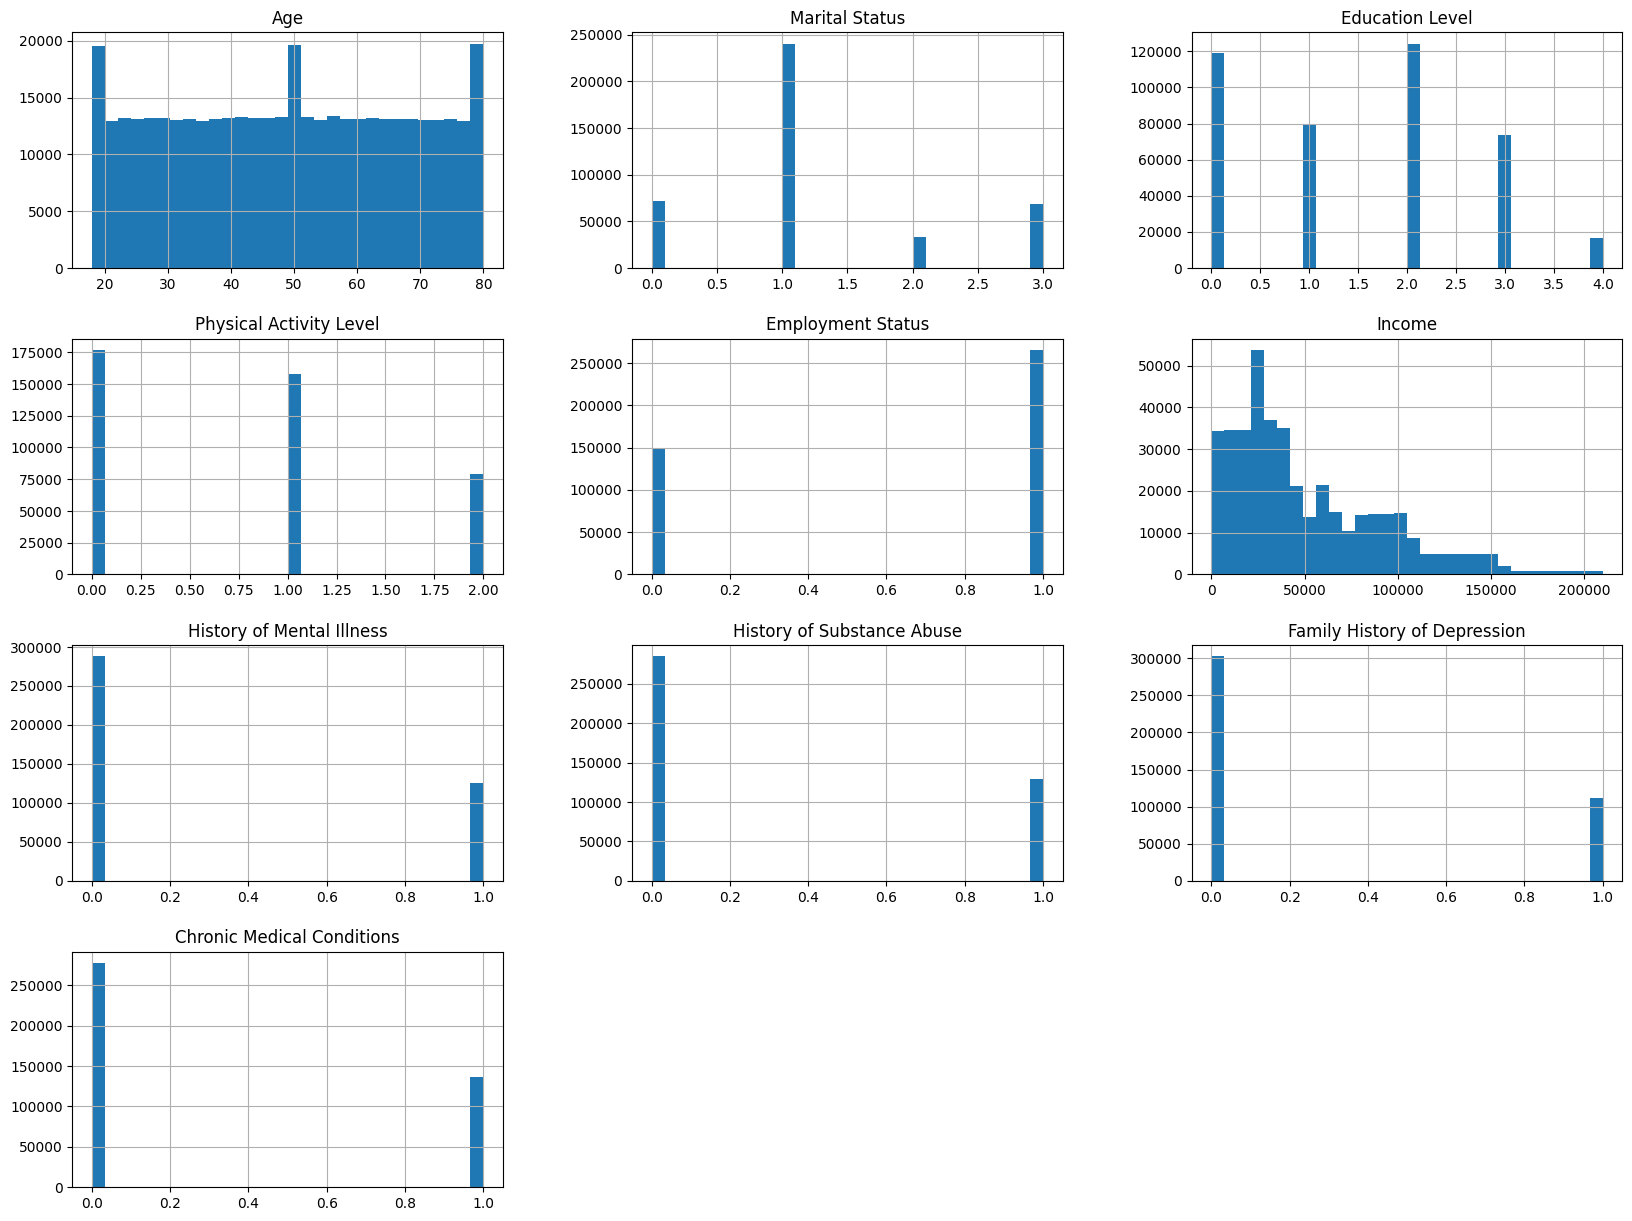

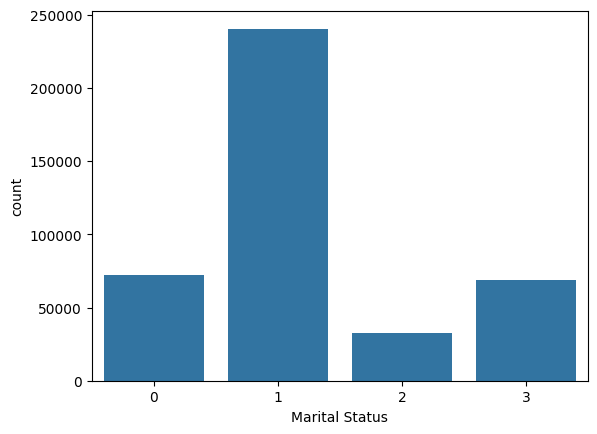

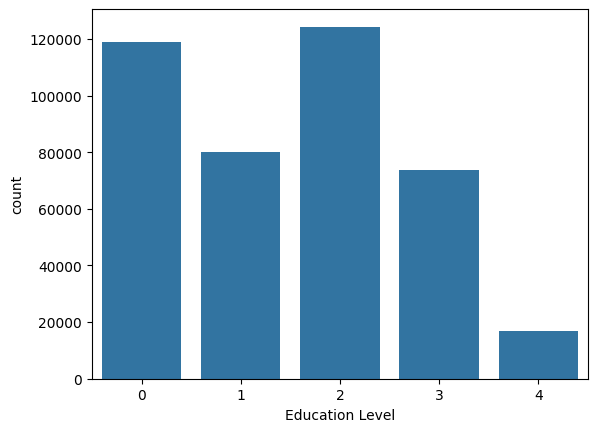

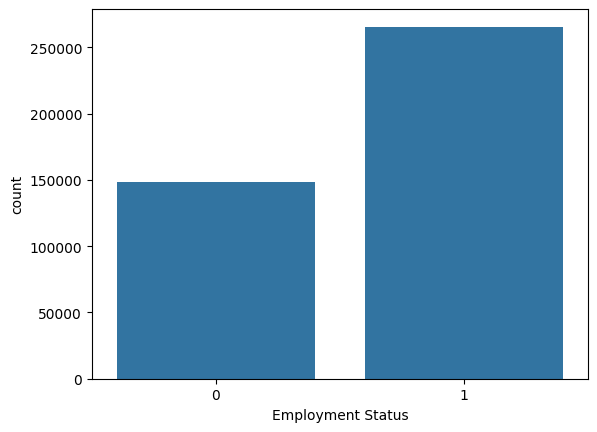

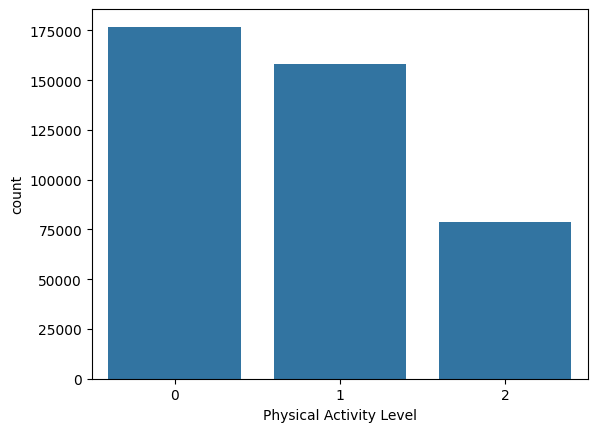

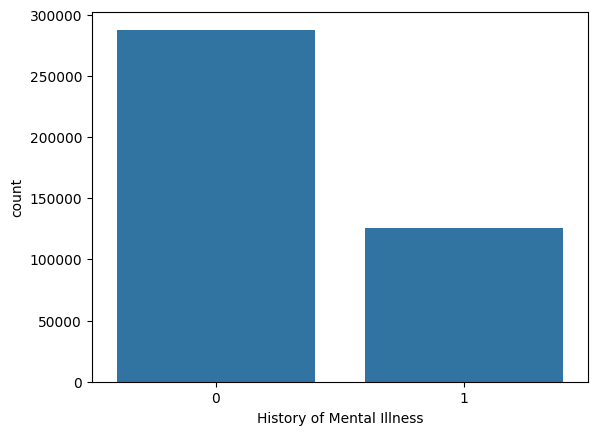

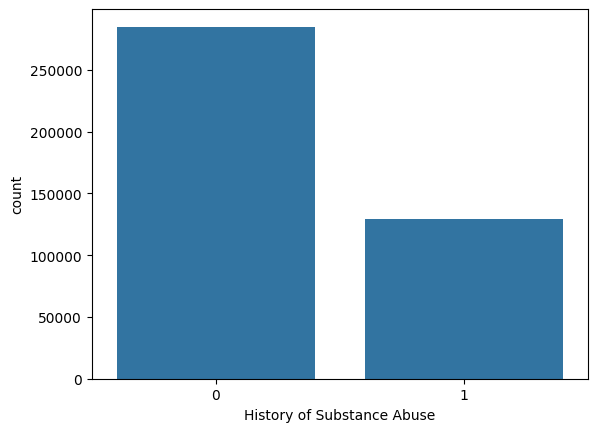

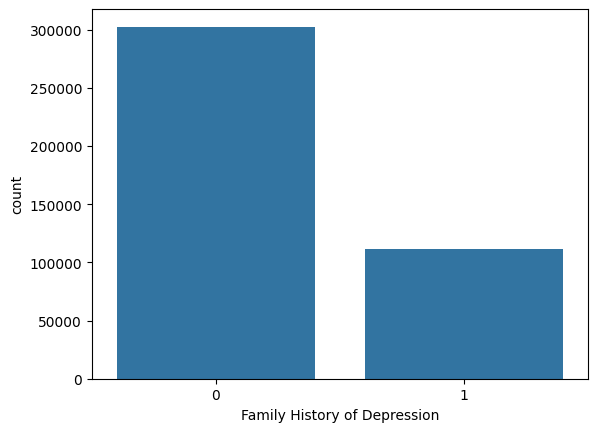

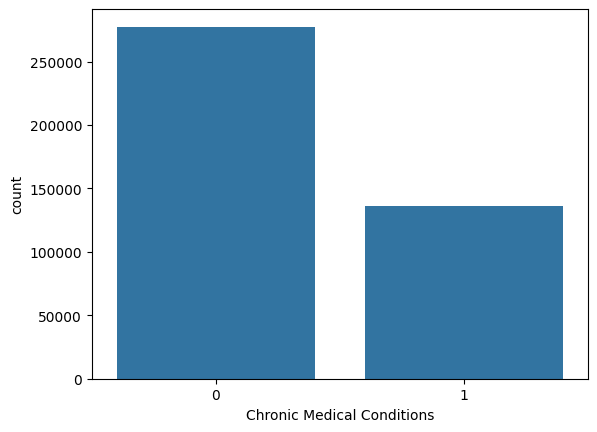

In [4]:
# Distribuciones de variables numéricas
data.hist(bins=30, figsize=(20,15))
plt.show()

# Distribuciones de variables categóricas
categorical_vars = ['Marital Status', 'Education Level', 'Employment Status', 'Physical Activity Level', 'History of Mental Illness', 'History of Substance Abuse', 'Family History of Depression', 'Chronic Medical Conditions']

for var in categorical_vars:
    sns.countplot(x=var, data=data)
    plt.show()

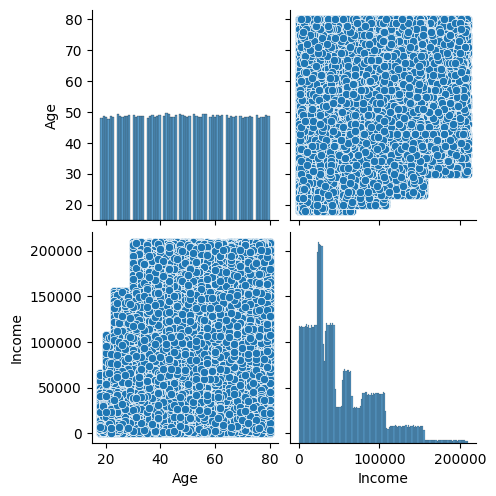

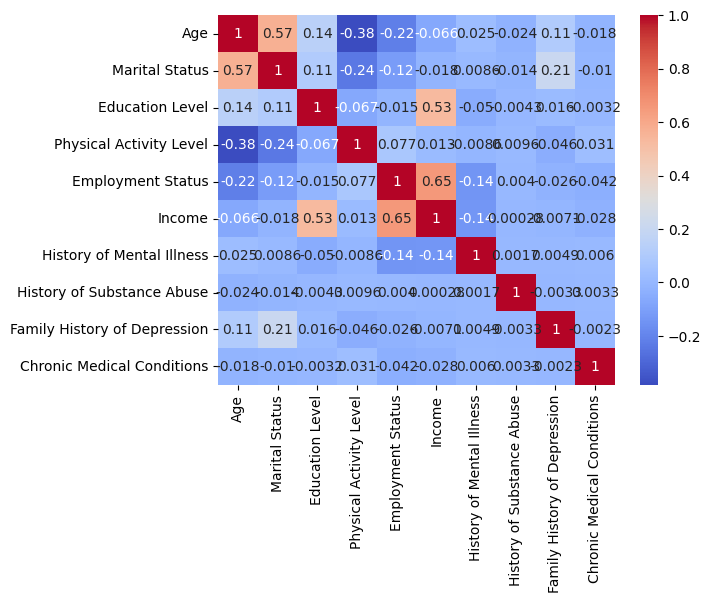

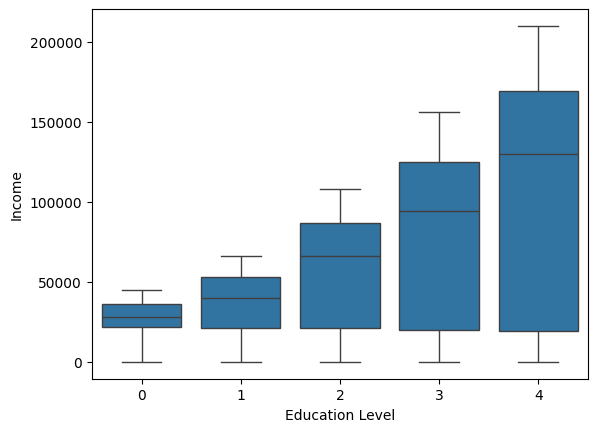

In [5]:
# Relaciones entre la edad y las otras variables
sns.pairplot(data, vars=['Age', 'Income'])
plt.show()

# Correlación entre variables
corr_matrix = data.corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.show()

# Relación entre el nivel educativo y el estado laboral
sns.boxplot(x='Education Level', y='Income', data=data)
plt.show()

In [7]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Definir variables independientes (X) y dependiente (y)
X = data.drop(columns=['Income'])
y = data['Income']

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Entrenar el modelo de regresión lineal
model = LinearRegression()
model.fit(X_train, y_train)

# Predicciones
y_pred = model.predict(X_test)

# Evaluación del modelo
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 462757062.35571253
R^2 Score: 0.7170241718364245


C:\Users\Santiago HG\AppData\Local\Temp\ipykernel_14244\3949322510.py:18: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis')


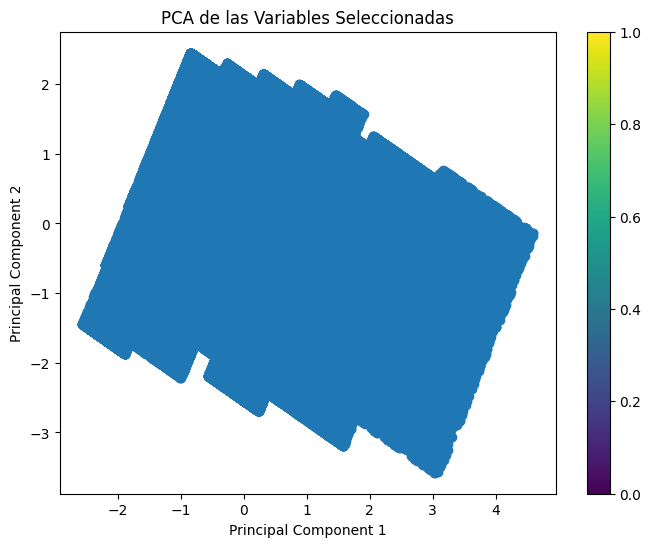

In [9]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Selección de variables para el PCA
features = ['Age', 'Education Level', 'Income', 'Physical Activity Level']
X = data[features]

# Escalar los datos
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# Visualizar los componentes principales
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA de las Variables Seleccionadas')
plt.colorbar()
plt.show()


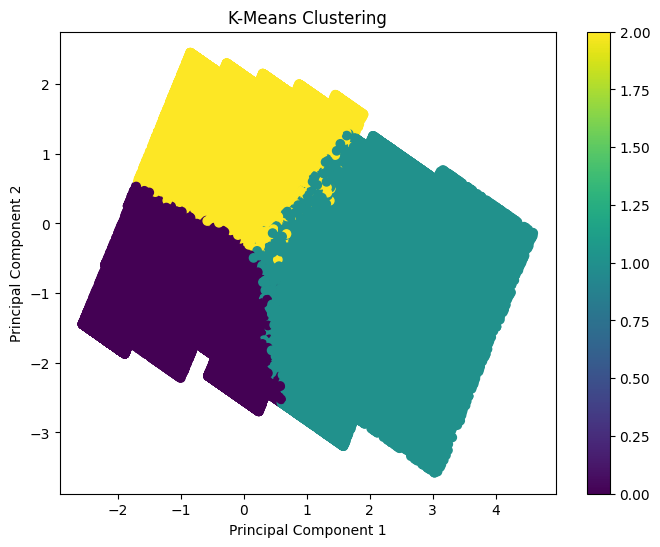

In [10]:
from sklearn.cluster import KMeans

# Aplicar K-Means
kmeans = KMeans(n_clusters=3)
clusters = kmeans.fit_predict(X_scaled)

# Visualizar los clusters
plt.figure(figsize=(8, 6))
plt.scatter(principal_components[:, 0], principal_components[:, 1], c=clusters, cmap='viridis')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('K-Means Clustering')
plt.colorbar()
plt.show()
